# Identify & Remove Duplicate Images via Hashing

## Configuration
#### Load Libraries

In [1]:
from io import BytesIO, StringIO
import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import ImageStat, Image
import requests
from tensorflow.keras.preprocessing.image import load_img
from skimage.transform import resize

#### File Directories

In [2]:
image_folder = 'D:/image_duplicates/'

## Read and Visualize Images

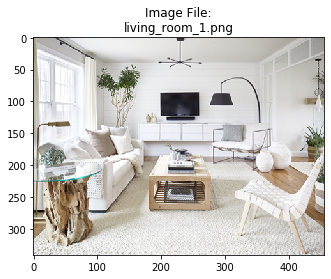

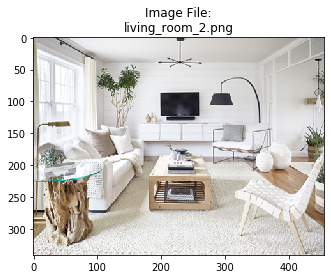

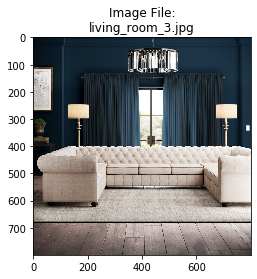

In [3]:
image_filenames = [f'{image_folder}{f}' for f in os.listdir(image_folder)]
image_arrays = np.array([np.array(load_img(f)) for f in image_filenames])

for i, x in enumerate(image_arrays):
    plt.figure()
    plt.imshow(x)
    plt.title(f'Image File:\n{os.listdir(image_folder)[i]}')
    plt.show()

## Convert to Hash & Identify Duplicates
#### Define Functions

In [4]:
def img_to_hash(img_path, new_size = (20,20)):
    """
    *** inspired by Vladislav Zorov ***
    Create approximate unique hash for a resized image
    Args:
        img_path: path to image file
        new_size: tuple of width and height dimensions of resized image
    """
    img_obj = Image.open(img_path).resize(new_size, Image.LANCZOS).convert(mode="L")
    img_mean = ImageStat.Stat(img_obj).mean[0]
    return sum((1 if j > img_mean else 0) << i for i, j in enumerate(img_obj.getdata()))


def get_duplicate_indices(input_list):
    """
    Return indices of duplicated items in a list (for removal)
    Args:
        input_list (list): list from which to identify duplicates
    Returns:
    list
    """
    elements = []
    duplicate_indices = []
    for i, x in enumerate(input_list):
        if x in elements:
            duplicate_indices.append(i)
        elements.append(x)
    return duplicate_indices

def load_non_duplicate_images(image_folder, resize_height = 10, resize_width = 10):
    """
    Remove duplicate 3d numpy arrays from folder of images.
    Resizing to smaller pixel dimensions is done to make hashing more effective.
    Args:
        arr (numpy.ndarray): 4d array of images
        resize_height (int): height to resize image. defaults to 20.
        resize_width (int): width to resize image. defaults to 20.
    Returns:
        numpy.ndarray
    """
    filenames = [f'{image_folder}{f}' for f in os.listdir(image_folder)]
    hash_list = [img_to_hash(x) for x in filenames]
    duplicate_indices = get_duplicate_indices(hash_list)
    non_duplicate_indices = [i for i in range(len(filenames)) if i not in duplicate_indices]
    if len(duplicate_indices) > 0:
        print(f'Skipping {len(duplicate_indices)} duplicate files in path {image_folder}')
    image_arrays = np.array([np.array(load_img(f)) for i, f in enumerate(image_filenames) if i not in duplicate_indices])
    return image_arrays

#### Show hashes created for each image

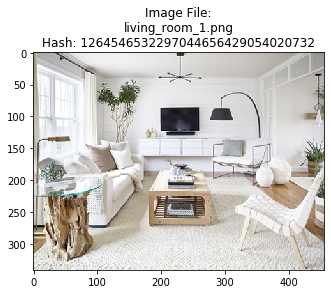

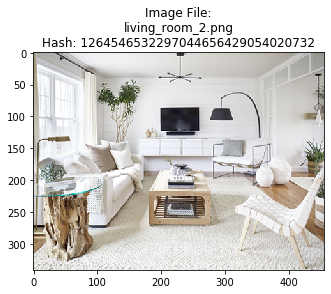

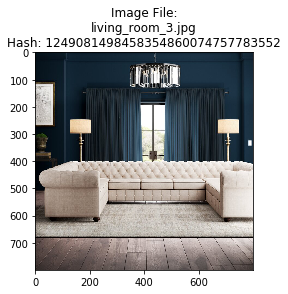

In [5]:
hash_list = [img_to_hash(IF, new_size = (10,10)) for IF in image_filenames]
for i, x in enumerate(image_arrays):
    plt.figure()
    plt.imshow(x)
    plt.title(f'Image File:\n{os.listdir(image_folder)[i]}\nHash: {hash_list[i]}')
    plt.show()

#### Load Images without Duplicates

In [6]:
deduped_images = load_non_duplicate_images(image_folder)

Skipping 1 duplicate files in path D:/image_duplicates/


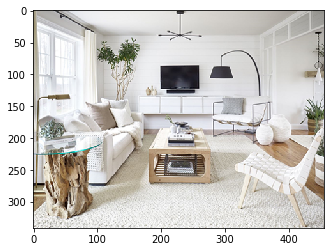

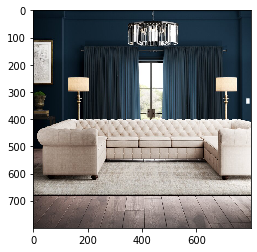

In [7]:
for i, x in enumerate(deduped_images):
    plt.figure()
    plt.imshow(x)
    plt.show()